## Assignment 1A - Backprop and Perceptrons

### Please include your name below
__Student name:__ Szu-Yeu Hu

### Data and preliminaries
Use the cell below to load any data or python libraries that you will need.

In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

train_X = np.load("train_X.npy")
train_y = np.load("train_y.npy")
val_X = np.load("val_X.npy")
val_y = np.load("val_y.npy")

train_X = np.hstack((np.ones((len(train_X),1)),train_X))
val_X = np.hstack((np.ones((len(val_X),1)),val_X))


### Question 1.1 (10 points)
Fill in the `forward_pass` funtion below. __No loops__ are allowed, use only matrix, vector, or elementwise operations.

In [2]:
## Fill in this funtion and have it return the correct result
def forward_pass(X,w):
    o = X.dot(w)
    p = 1/(1+np.exp(-o))
    
    return p

### Question 1.2 (10 points)
Fill in the `backward_pass` function below. __No loops__ are allowed, use only matrix, vector, or elementwise operations. You should be computing the average gradient, instead of the sum of gradients in the backward pass. 

In [3]:
def backward_pass(y,X,p):
    
    loss = np.mean(-(y*np.log(p) + (1-y)*np.log(1-p)))
    grad = X.T.dot(p - y)/X.shape[0]
    
    return loss,grad

### Question 1.3 (20 points)
Train your perceptron using the `forward_pass` and `backward_pass` funtions for 1,000 iterations. Report the loss, accuracy, AUC for both the training and validation data sets. Plot the training and validation loss vs the iteration number. Modify this cell to include your your results and commentary on your approach. 

---

My learning rate was: 0.05

| Metric        | Training      | Validation  |
| ------------- | ------------- |-------------|
| Loss          |      0.2751      |      0.3226    |
| Accuracy      | 88.71%      |      87.58%   |
| AUC           | 0.8702      |      0.8397    |


Please include the required discussion points here.
The accuracy of training and validation set are between 87-89% with different learning rates. The plot shows that the model is mildly overfitting, since the loss of training and validation are enlarging over iterations. But such effect is not significant, and two line looks almost parallel. To sum up, I would not take it as overfitting regarding this plot.

In [4]:
## Your code goes here
w = np.zeros(train_X.shape[1],dtype= 'float32')
train_loss_list = []
val_loss_list = []
accuracy_list = []
n_iterations = 1000
lr = 0.05
for iter in range(n_iterations):
    train_p = forward_pass(train_X,w)
    train_loss,g = backward_pass(train_y,train_X,train_p)
    
    val_p = forward_pass(val_X,w)
    val_loss = np.mean(-(val_y*np.log(val_p+1e-8) + (1-val_y)*np.log(1-val_p+1e-8)))

    w = w - lr * g
    
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    

In [5]:
train_p = (forward_pass(train_X,w))
train_pred = np.round(train_p)
train_acc = np.sum(train_y == train_pred)/len(train_y)
val_p = (forward_pass(val_X,w))
val_pred = np.round(val_p)
val_acc = np.sum(val_y == val_pred)/len(val_y)
print("training accuracy:" + str(train_acc))
print("validation accuracy:" + str(val_acc))

training accuracy:0.8871330290852122
validation accuracy:0.8758535071384234



Area under the ROC curve: 0.8701828546970148


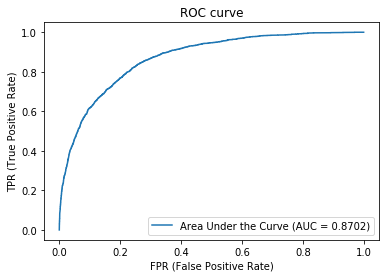

In [6]:
#Training set Area under the ROC curve
fpr, tpr, thresholds = roc_curve(train_y, train_p)
AUC_ROC = roc_auc_score(train_y, train_p)
print("\nArea under the ROC curve: " + str(AUC_ROC))
#roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")


Area under the ROC curve: 0.839732739714299


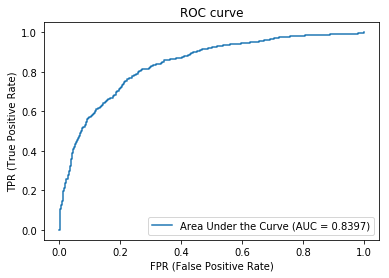

In [7]:
fpr, tpr, thresholds = roc_curve(val_y, val_p)
AUC_ROC = roc_auc_score(val_y, val_p)
print("\nArea under the ROC curve: " + str(AUC_ROC))
#roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")

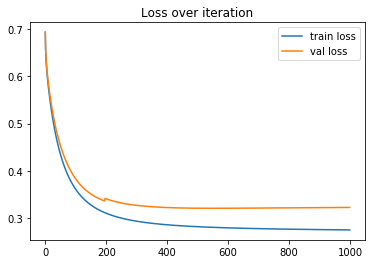

In [8]:
plt.plot(range(n_iterations),train_loss_list)
plt.plot(range(n_iterations),val_loss_list)
plt.title("Loss over iteration")
plt.legend(["train loss","val loss"])

### Question 1.4 (10 points)
Repeat question 1.3 but include $L_2$ regularization. Show your code in the cell below. Fill out the table and values in this cell and include the discussion comparing this model to the previous model.

---

My learning rate was: 0.05
<br/>
My optimal value for $\lambda$ was: 0.0073

Results for the __best__ model are shown below:


| Metric        | Training      | Validation  |
| ------------- | ------------- |-------------|
| Loss          |      0.285      |      0.326    |
| Accuracy      | 88.71%      |      87.58%    |
| AUC           | 0.8691      |      0.8427    |


Discussion points included below:
After searching for 20 different lambda values between 0.01 and 0.00001, the lambda that gives the best validation accuracy is 0.0073. The additional regularization term cause the loss of training set increase from to  0.275 to 0.285, and loss of validation set increase from 0.3226 to 0.326.
The accuracy did not improve comparing with the model without regularization, but the AUC of validation set improve from 0.8427 to 0.8397.

Overall, the regularization term did not improve this model significantly.


In [9]:
## Modifications that you will need to make to add the L2 regularization
def backward_pass_l2(y,X,p,w,lam):
    grad = X.T.dot(p - y)/X.shape[0] + 2 * lam * w
    
    return grad

def cost_with_l2(y,p,w,lam):
    cost = np.mean(-(np.log(p + 1e-8)*y + np.log(1-p + 1e-8)*(1-y))) + lam * np.sum(w**2)
    return cost


In [10]:
def training(train_X, train_y, val_X, val_y, lr, lam, n_iterations):   
    w = np.zeros(train_X.shape[1],dtype= 'float32')
    train_cost_list = []
    val_cost_list = []
    train_loss_list = []
    val_loss_list = []
    for iter in range(n_iterations):
        train_p = forward_pass(train_X,w)
        train_cost = cost_with_l2(train_y, train_p, w, lam)
        train_loss =  np.mean(-(train_y*np.log(train_p + 1e-8) + (1-train_y)*np.log(1-train_p+1e-8)))
        g = backward_pass_l2(train_y,train_X,train_p, w, lam)

        val_p = forward_pass(val_X,w)
        val_cost = cost_with_l2(val_y, val_p, w, lam)
        val_loss = np.mean(-(val_y*np.log(val_p+1e-8) + (1-val_y)*np.log(1-val_p+1e-8)))

        w = w - lr * g

        train_cost_list.append(train_cost)
        val_cost_list.append(val_cost)
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
    
    return w, train_loss_list, val_loss_list, train_cost_list, val_cost_list

def testing(train_X, train_y, val_X, val_y, w):
    train_p = (forward_pass(train_X,w))
    train_pred = np.round(train_p)
    train_acc = np.sum(train_y == train_pred)/len(train_y)
    val_p = (forward_pass(val_X,w))
    val_pred = np.round(val_p)
    val_acc = np.sum(val_y == val_pred)/len(val_y)
    #print("training accuracy:" + str(train_acc))
    #print("validation accuracy:" + str(val_acc))
    
    
    train_auc = roc_auc_score(train_y, train_p)
    #print("Area under the ROC curve: " + str(train_auc))
    val_auc = roc_auc_score(val_y, val_p)
    #print("Area under the ROC curve: " + str(val_auc))
    
    return train_acc, val_acc, train_auc, val_auc

# Training settings
n_iterations = 1000
lr = 0.05
#lrs = np.linspace(start = 1e-1, stop = 1e-5, num = 20)
lambda_list = np.linspace(start=1e-2, stop=1e-5, num=20)
#lam = 0.01
best_lambda = 0
best_train_loss_list = []
best_val_loss_list = []
best_train_cost_list = []
best_val_cost_list = []
best_train_acc = 0
best_val_acc = 0
best_train_auc = 0
best_val_auc = 0

for lam in lambda_list:
    w, train_loss_list, val_loss_list, train_cost_list, val_cost_list = training(train_X, train_y, val_X, val_y, lr, lam, n_iterations)
    train_acc, val_acc,train_auc, val_auc = testing(train_X, train_y, val_X, val_y, w)
    
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_train_acc = train_acc
        best_val_loss_list = val_loss_list
        best_train_loss_list = train_loss_list
        best_val_cost_list = val_cost_list
        best_train_cost_list = train_cost_list
        best_train_auc = train_auc
        best_val_auc = val_auc
        best_lambda = lam
    

In [11]:
print("best lambda:" + str(best_lambda))
print("best training accuracy: " + str(best_train_acc))
print("best validation accuracy: " + str(best_val_acc))
print("best training AUC:", best_train_auc)
print("best validation AUC:", best_val_auc)

best lambda:0.0073710526315789475
best training accuracy: 0.8871330290852122
best validation accuracy: 0.8758535071384234
best training AUC: 0.8690609015319285
best validation AUC: 0.8427310207656896


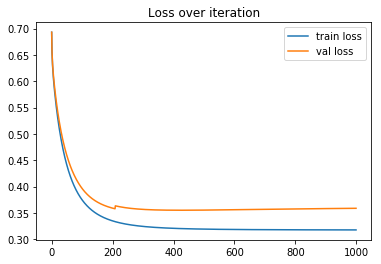

In [12]:
plt.plot(range(n_iterations),best_train_cost_list)
plt.plot(range(n_iterations),best_val_cost_list)
plt.title("Loss over iteration")
plt.legend(["train loss","val loss"])